4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/25
469/469 [==============================] - 18s 27ms/step - loss: 0.4418 - val_loss: 0.3681
Epoch 2/25
469/469 [==============================] - 10s 22ms/step - loss: 0.3531 - val_loss: 0.3419
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3331 - val_loss: 0.3293
Epoch 4/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3237 - val_loss: 0.3258
Epoch 5/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3188 - val_loss: 0.3219
Epoch 6/25
469/469 [==============================] - 6s 14ms/step - loss: 0.3152 - val_loss: 0.3154
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3121 - val_loss: 0.3124
Epoch 8/25
469/469 [==============================] - 5s 10ms/step - loss: 0.3094 - val_loss: 0.3086
Epoch 9/25
469/469 [==============================] - 6s 12ms/step - loss: 0.3068 - val_loss: 0.3078
Epoch 10/25
469/469 [=====

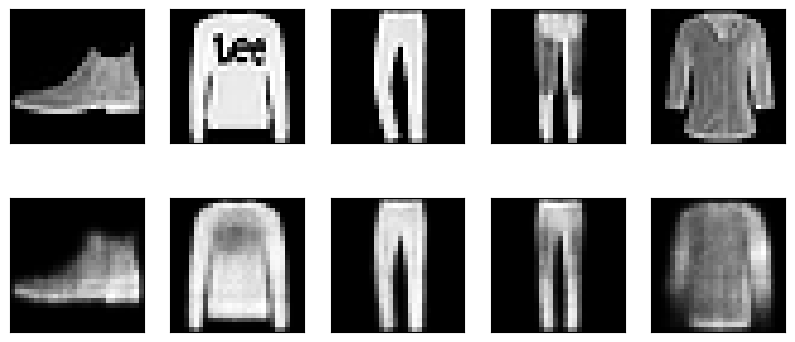

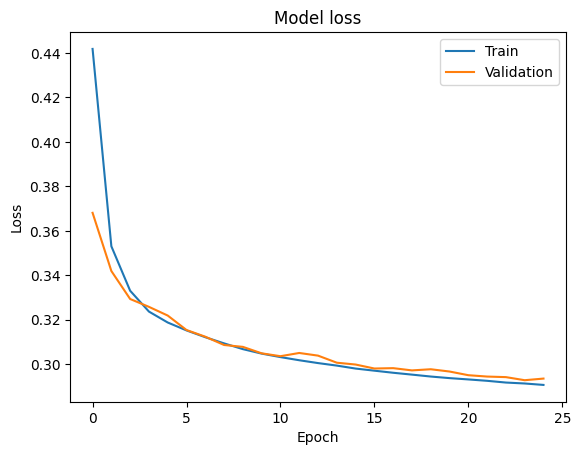

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adadelta

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define hyperparameters
encoding_dim = 32
input_dim = x_train.shape[1]
learning_rate = 1.0
batch_size = 128
epochs = 25

# Define the autoencoder model
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
optimizer = Adadelta(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Plotting function for original and reconstructed images
def plot_images(original, reconstructed, num_images=5):
    n = num_images
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize original and reconstructed images
plot_images(x_test, decoded_imgs)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Epoch 1/10
469/469 [==============================] - 7s 11ms/step - loss: 0.4735 - val_loss: 0.7898
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3770 - val_loss: 0.9392
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3593 - val_loss: 0.9678
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3436 - val_loss: 0.9891
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3339 - val_loss: 0.9885
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3287 - val_loss: 1.0228
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3255 - val_loss: 1.0970
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3232 - val_loss: 1.0535
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.3214 - val_loss: 1.0796
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


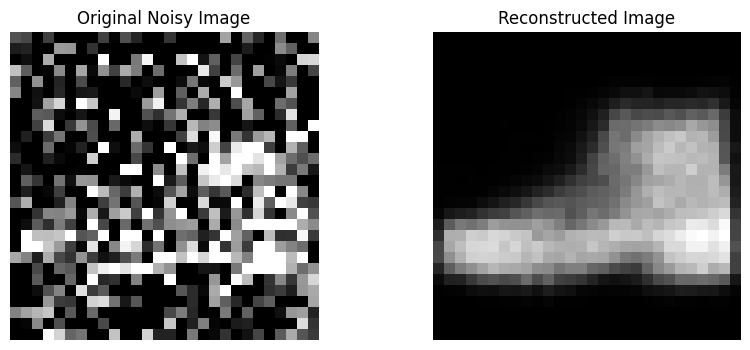

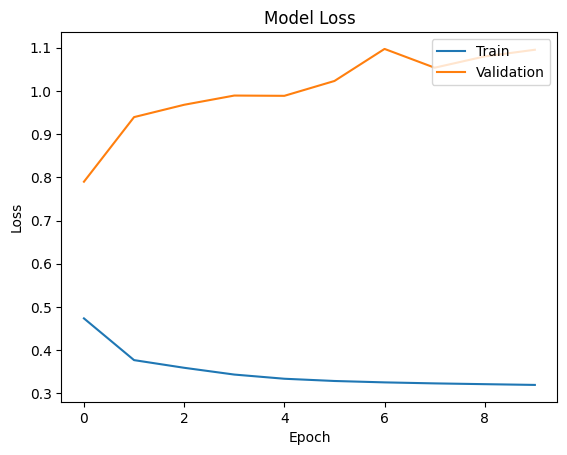

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adadelta

# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define hyperparameters
encoding_dim = 32
input_dim = x_train.shape[1]
noise_factor = 0.5
learning_rate = 1.0
batch_size = 128
epochs = 25

# Define the denoising autoencoder model
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

denoising_autoencoder = Model(input_img, decoded)
optimizer = Adadelta(learning_rate=learning_rate)
denoising_autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

# Introducing noise to the input data
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the denoising autoencoder
history = denoising_autoencoder.fit(x_train_noisy, x_train,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    validation_data=(x_test_noisy, x_test_noisy))

# Predict on test data
decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

# Visualize one original and reconstructed image
plt.figure(figsize=(10, 4))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[0].reshape(28, 28), cmap='gray')
plt.title('Original Noisy Image')
plt.axis('off')
# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[0].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
